In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
set(df['status'])

{'fn', 'fp', 'tp'}

In [6]:
df = df[df['status'] != 'fn']

In [7]:
df.index = np.arange(len(df))

In [8]:
df.shape

(10451, 11)

In [9]:
tp = df[df['status'] == 'tp']
tp.index = np.arange(len(tp))
fp = df[df['status'] == 'fp']
fp.index = np.arange(len(fp))
tp.shape, fp.shape

((2220, 11), (8231, 11))

In [10]:
list(df)

['RA',
 'DEC',
 'area',
 'min_rad',
 'max_rad',
 'min_pred',
 'max_pred',
 'tRA',
 'tDEC',
 'status',
 'catalog']

In [19]:
def show_scatters(df, s=1, alpha=0.9):
    params = ['area', 'min_rad', 'max_rad', 'min_pred', 'max_pred']
    colors = 'bgrcmykw'
    catalogs = ['planck_z', 'planck_no_z', 'mcxcwp', 'act']
    fig, ax = plt.subplots(5, 5, figsize=(20, 20))
    fp = df[df['status'] == 'fp']
    tp = df[df['status'] == 'tp']
    for i in range(5):
        for j in range(5):
            ax[i][j].scatter(fp[params[i]], fp[params[j]], c='k', s=s, alpha=alpha)
            for color, catalog in zip(colors, catalogs):
                ax[i][j].scatter(tp[tp['catalog'] == catalog][params[i]], 
                       tp[tp['catalog'] == catalog][params[j]], c=color, s=s, 
                                 alpha=alpha)
            ax[i][j].set_xlabel(params[i])
            ax[i][j].set_ylabel(params[j])
    plt.show()

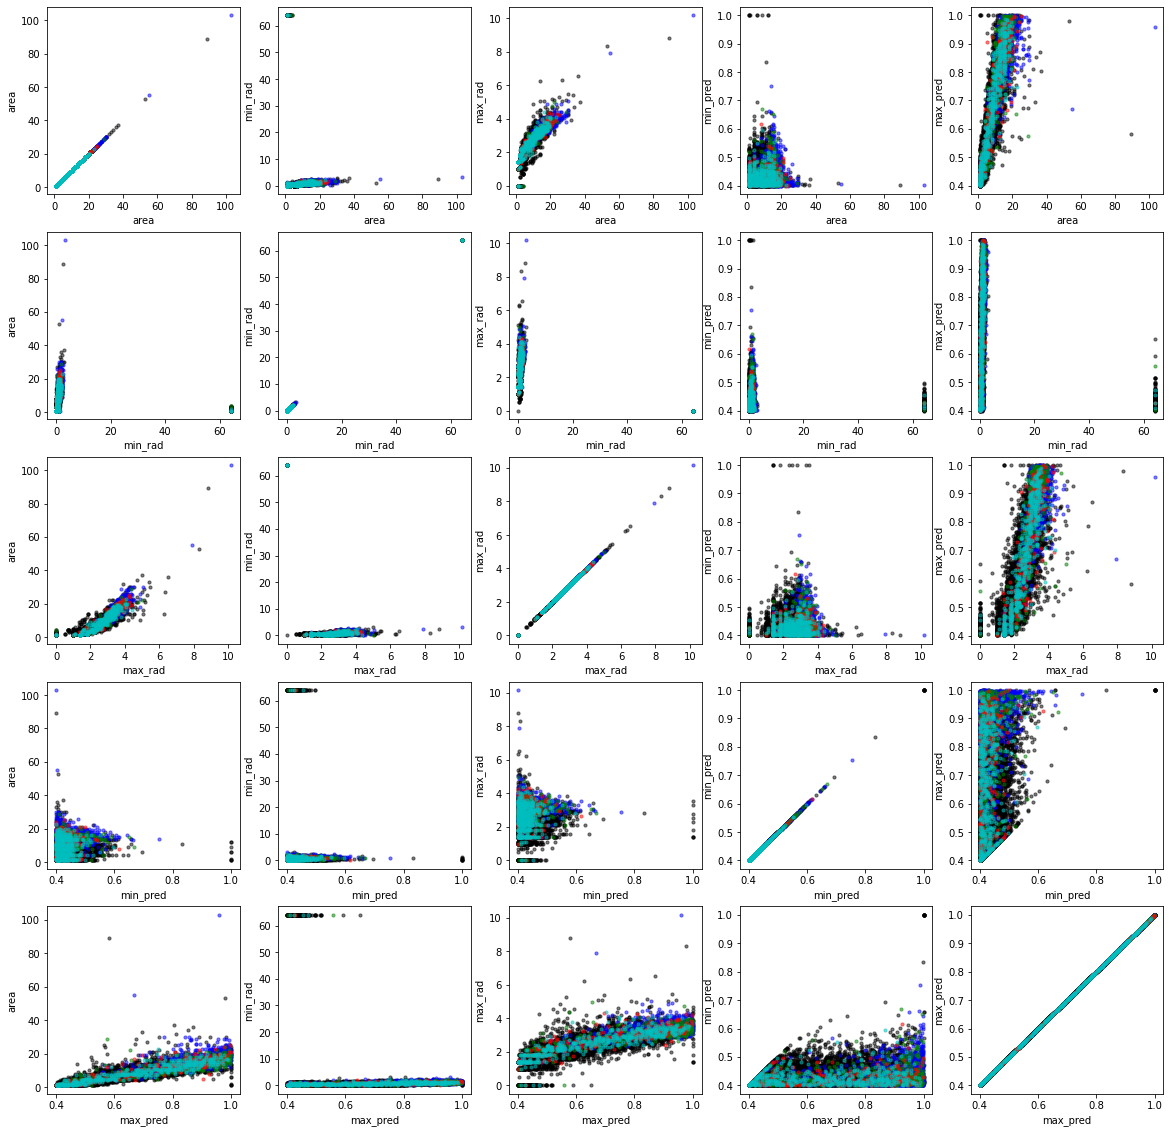

In [20]:
df = pd.read_csv('/home/rt2122/Data/scans_extended/ep14_thr0.4.csv')
show_scatters(df, s=10, alpha=0.5)

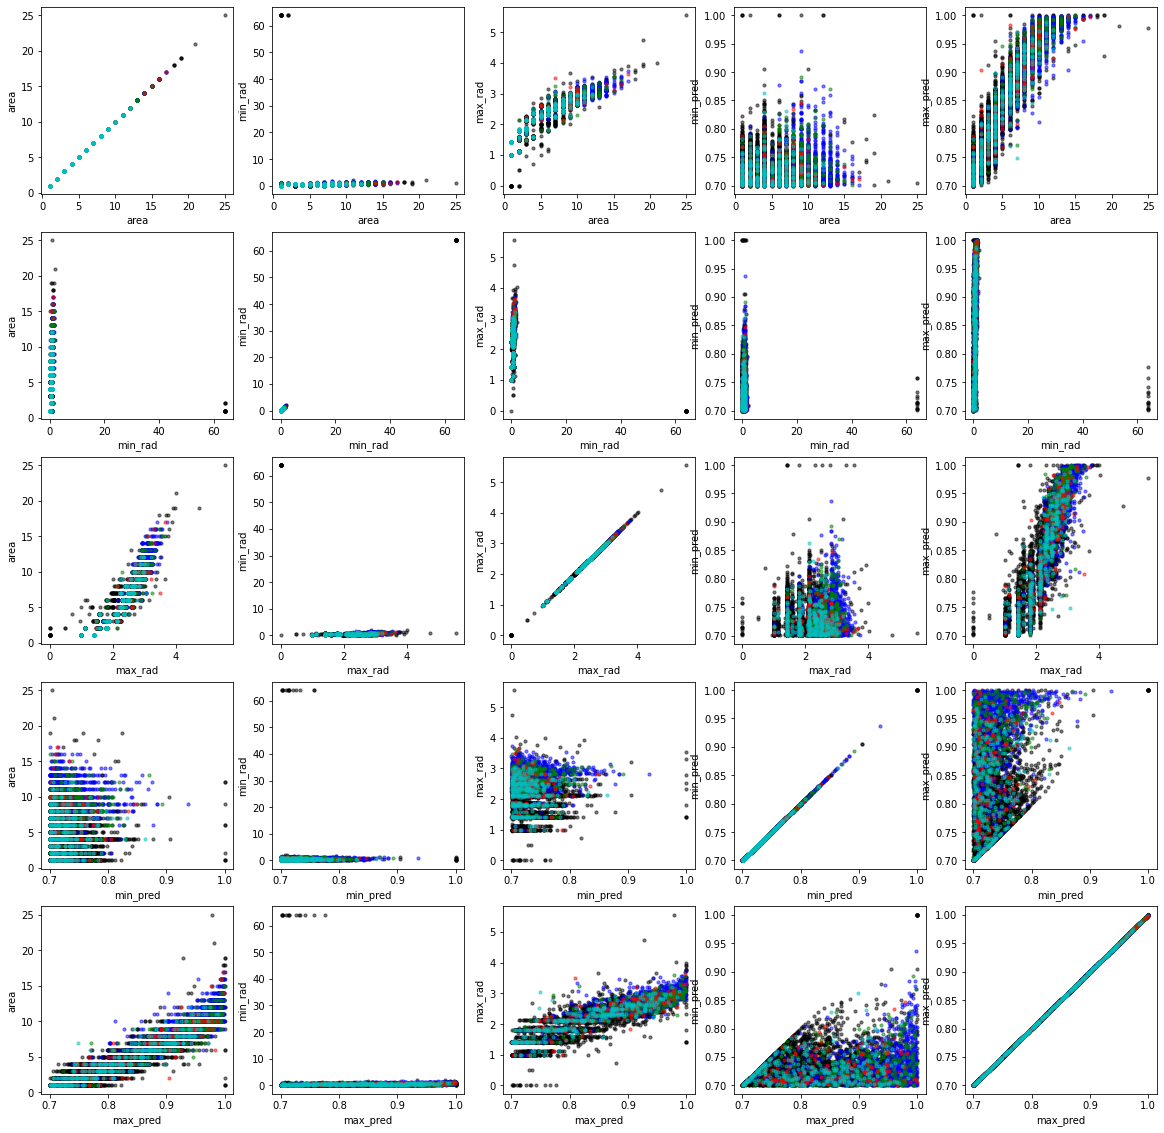

In [21]:
df = pd.read_csv('/home/rt2122/Data/scans_extended/ep14_thr0.7.csv')
show_scatters(df, s=10, alpha=0.5)

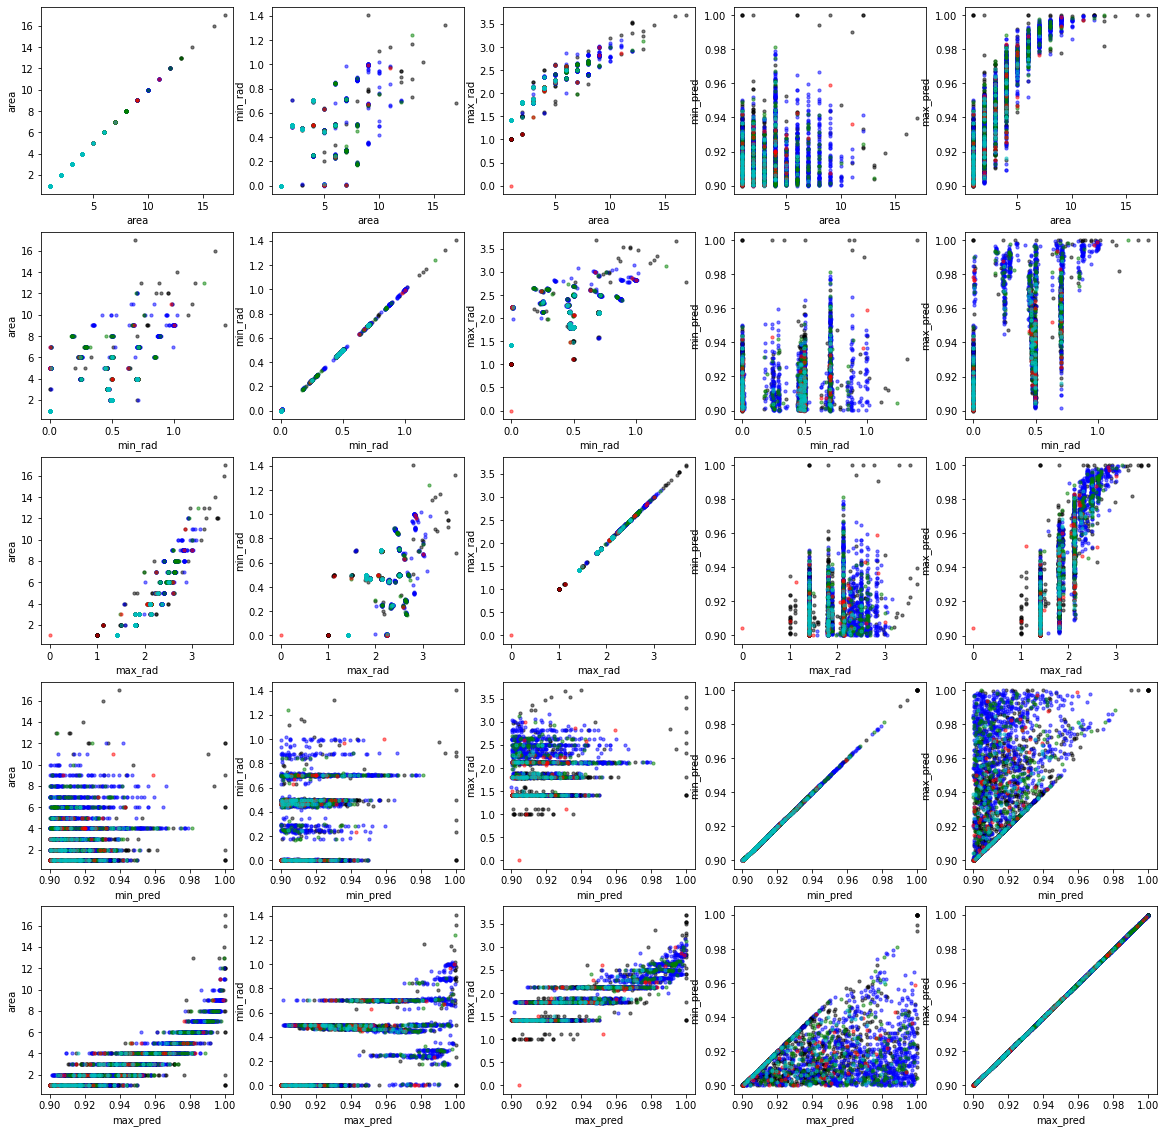

In [22]:
df = pd.read_csv('/home/rt2122/Data/scans_extended/ep14_thr0.9.csv')
show_scatters(df, s=10, alpha=0.5)

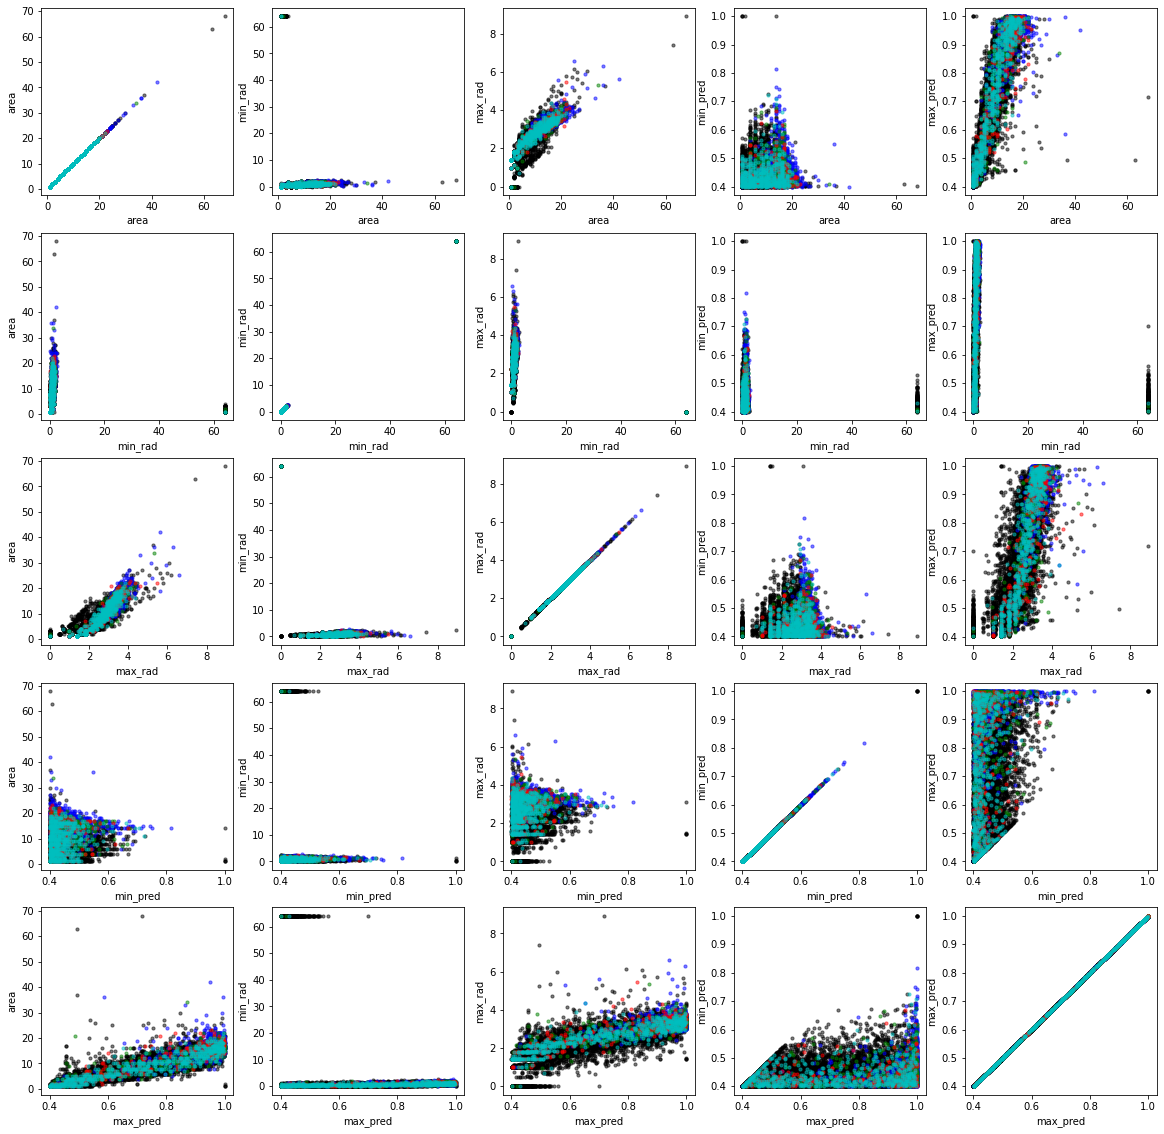

In [23]:
df = pd.read_csv('/home/rt2122/Data/scans_extended/ep40_thr0.4.csv')
show_scatters(df, s=10, alpha=0.5)

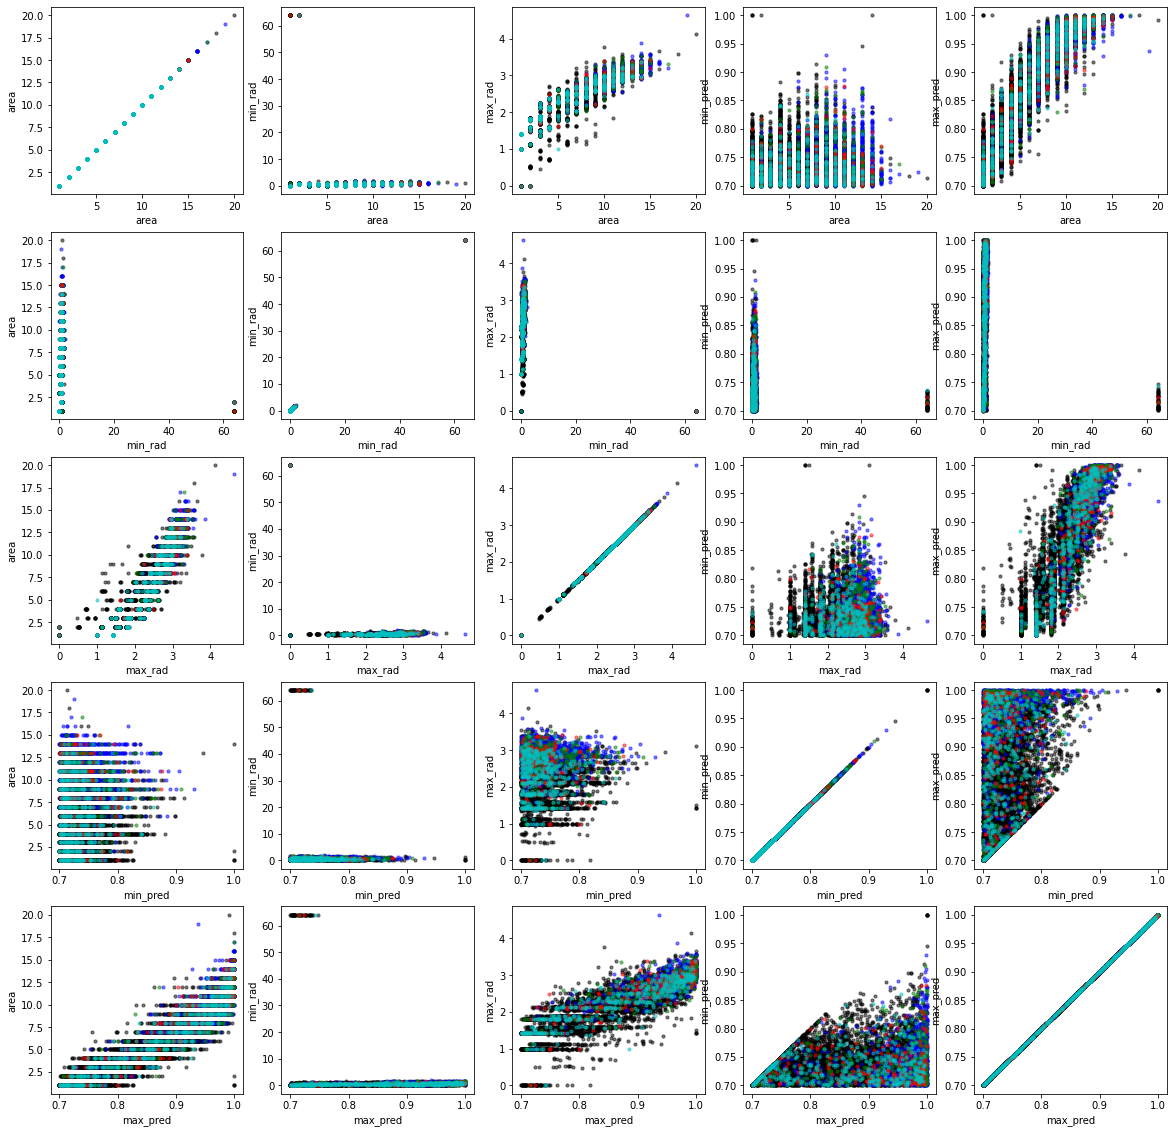

In [24]:
df = pd.read_csv('/home/rt2122/Data/scans_extended/ep40_thr0.7.csv')
show_scatters(df, s=10, alpha=0.5)

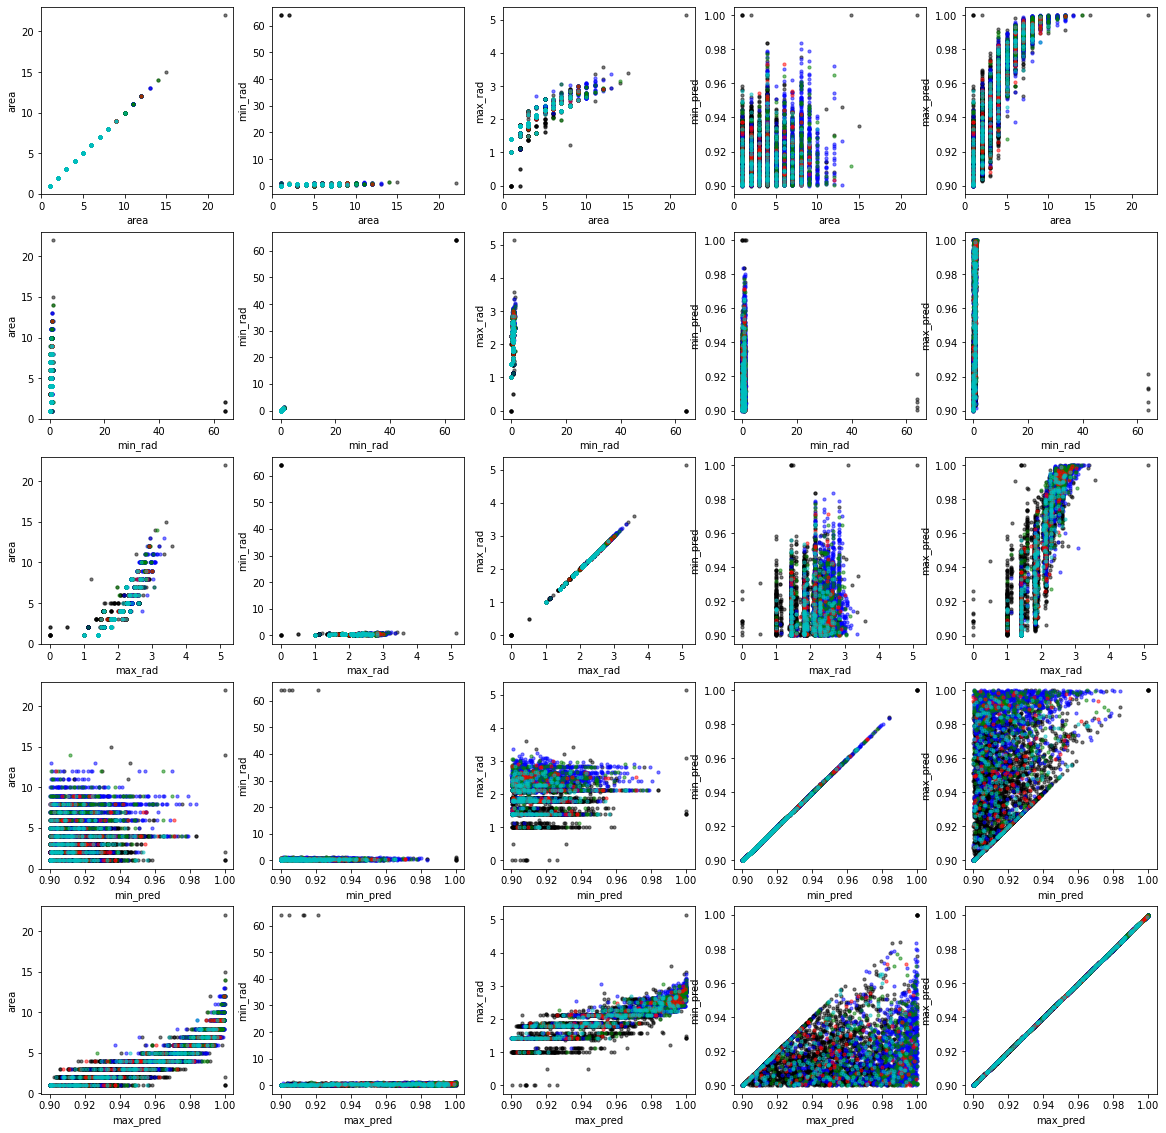

In [25]:
df = pd.read_csv('/home/rt2122/Data/scans_extended/ep40_thr0.9.csv')
show_scatters(df, s=10, alpha=0.5)